#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [102]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


# Load the dataset to inspect its contents
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
heart_data.head(), heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 None)

In [104]:
# Statistical summary of the dataset
summary_statistics = heart_data.describe()

# Checking the distribution of the target variable
target_distribution = heart_data['target'].value_counts()

summary_statistics, target_distribution


(              age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std      0.52

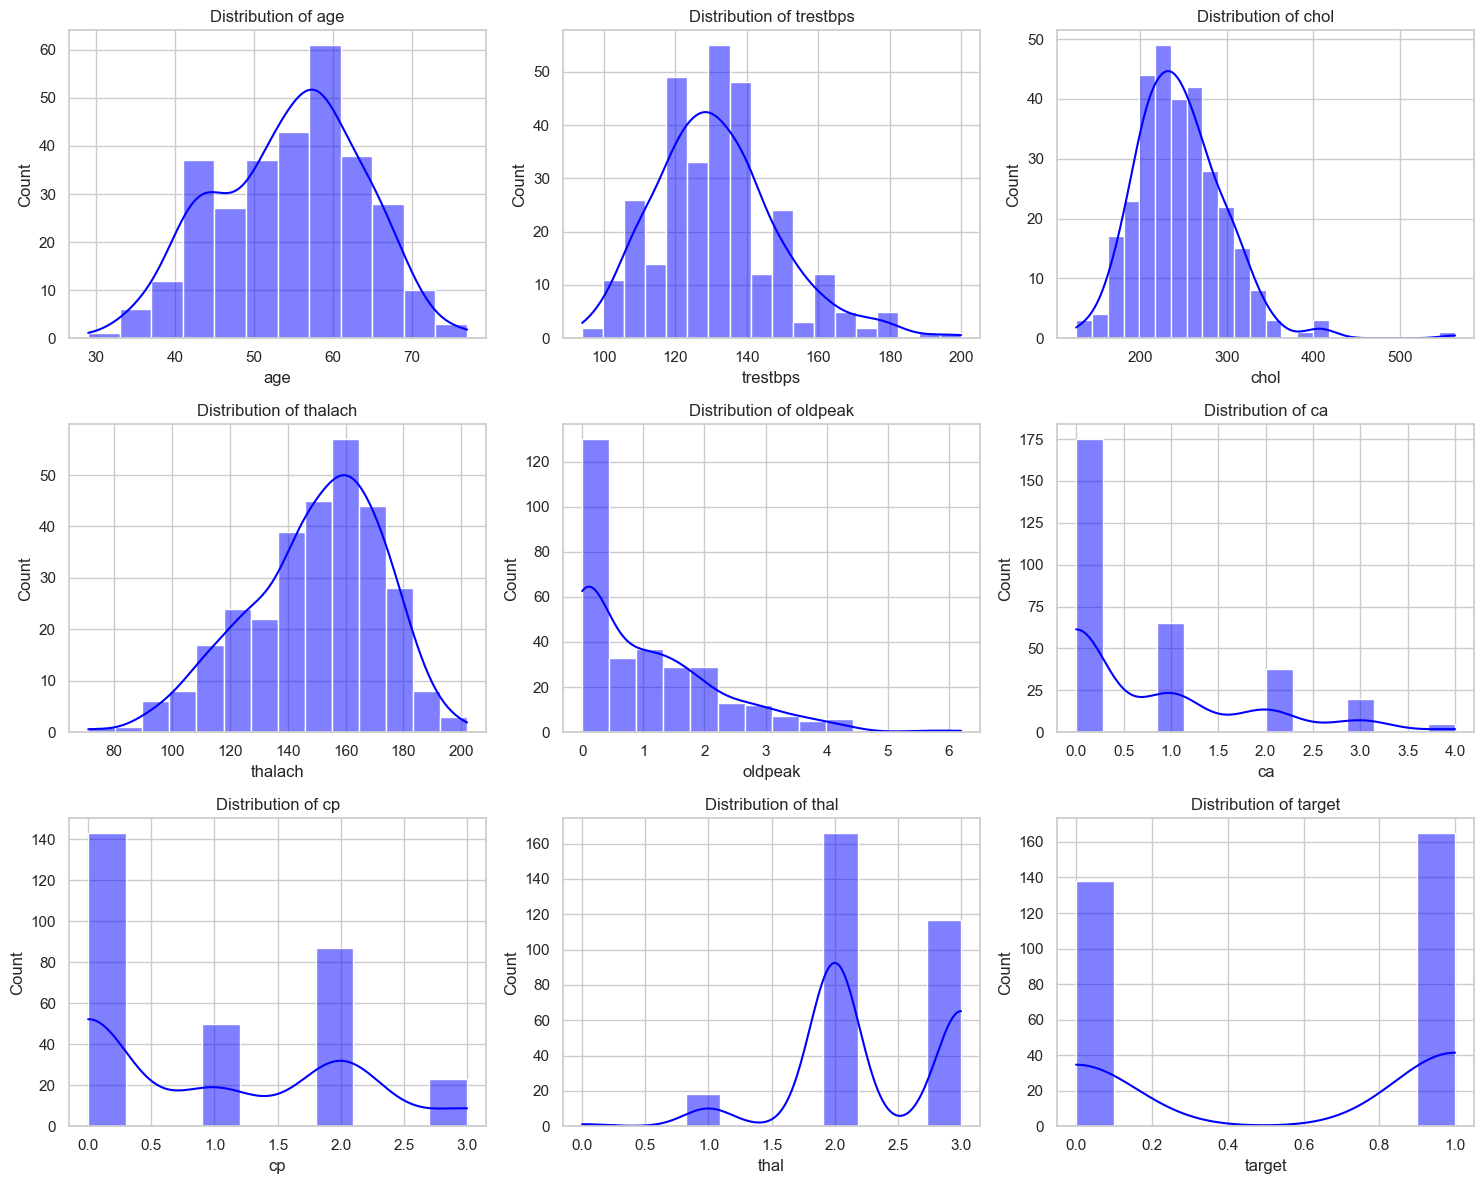

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Univariate Analysis - Distribution of key features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp', 'thal', 'target']
for i, feature in enumerate(features):
    sns.histplot(heart_data[feature], kde=True, ax=axes[i // 3, i % 3], color="blue")
    axes[i // 3, i % 3].set_title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


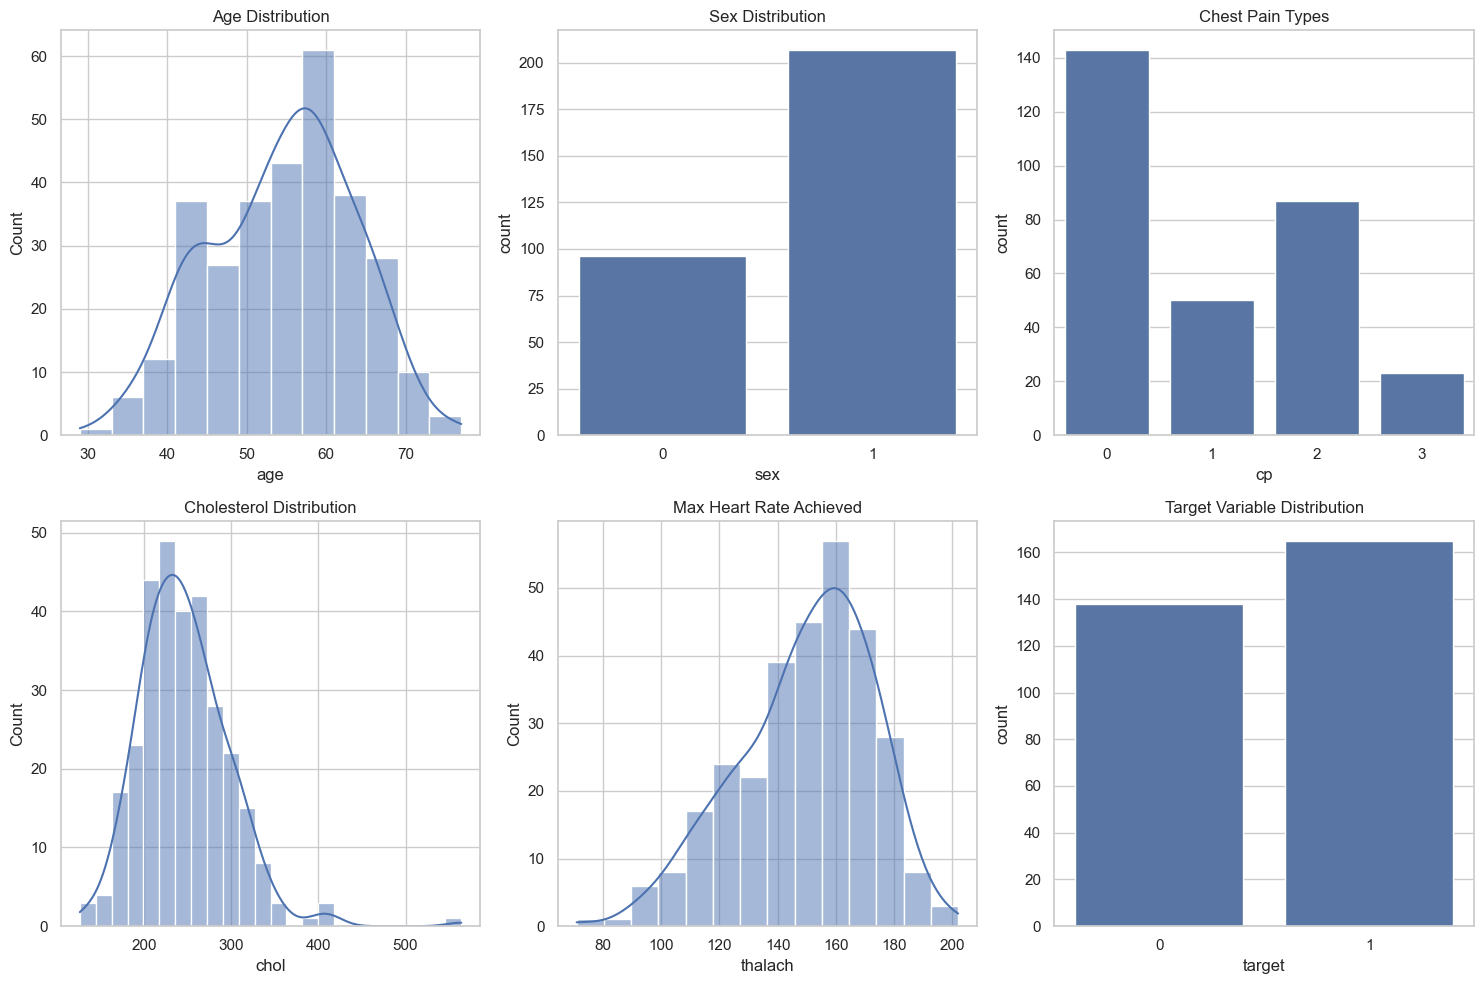

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis: Distribution of key features
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(heart_data['age'], kde=True, ax=axs[0, 0]).set_title('Age Distribution')
sns.countplot(data=heart_data, x='sex', ax=axs[0, 1]).set_title('Sex Distribution')
sns.countplot(data=heart_data, x='cp', ax=axs[0, 2]).set_title('Chest Pain Types')
sns.histplot(heart_data['chol'], kde=True, ax=axs[1, 0]).set_title('Cholesterol Distribution')
sns.histplot(heart_data['thalach'], kde=True, ax=axs[1, 1]).set_title('Max Heart Rate Achieved')
sns.countplot(data=heart_data, x='target', ax=axs[1, 2]).set_title('Target Variable Distribution')

plt.tight_layout()
plt.show()



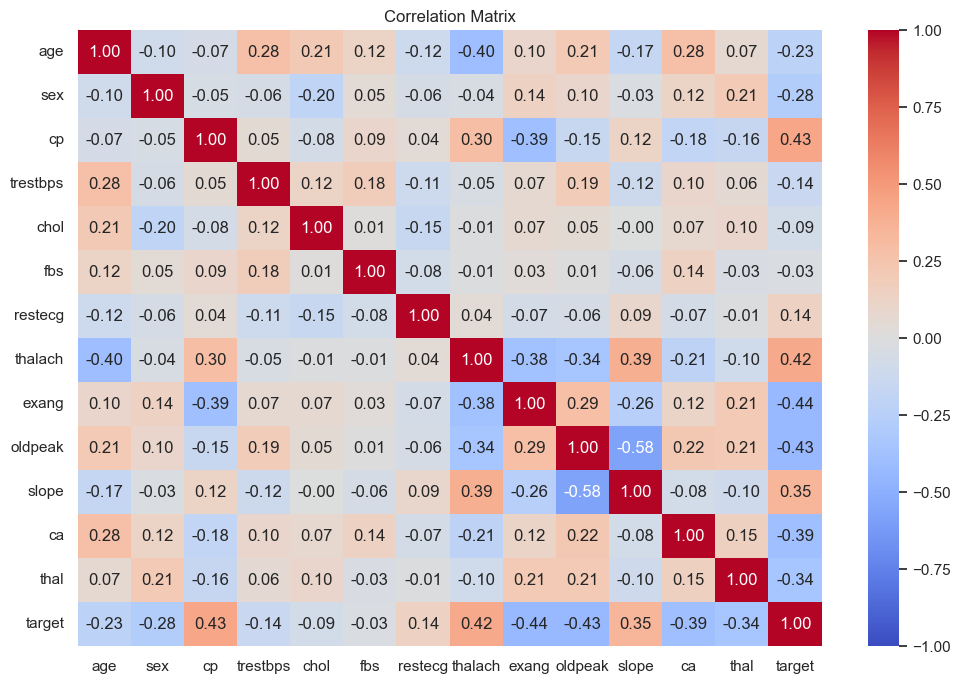

In [110]:

# Bivariate analysis: Heatmap for correlation
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

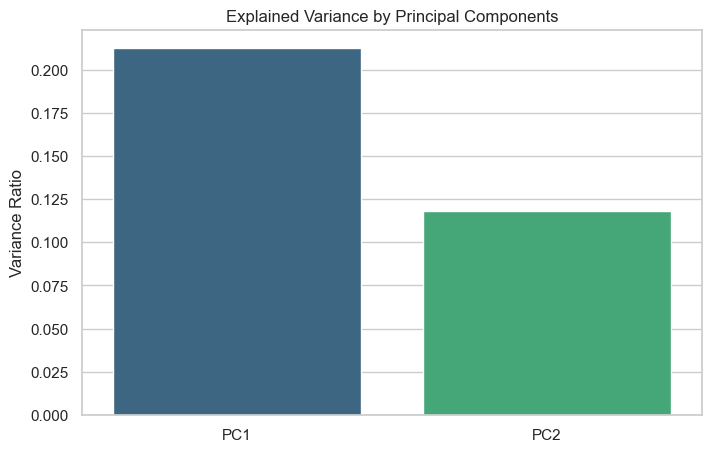

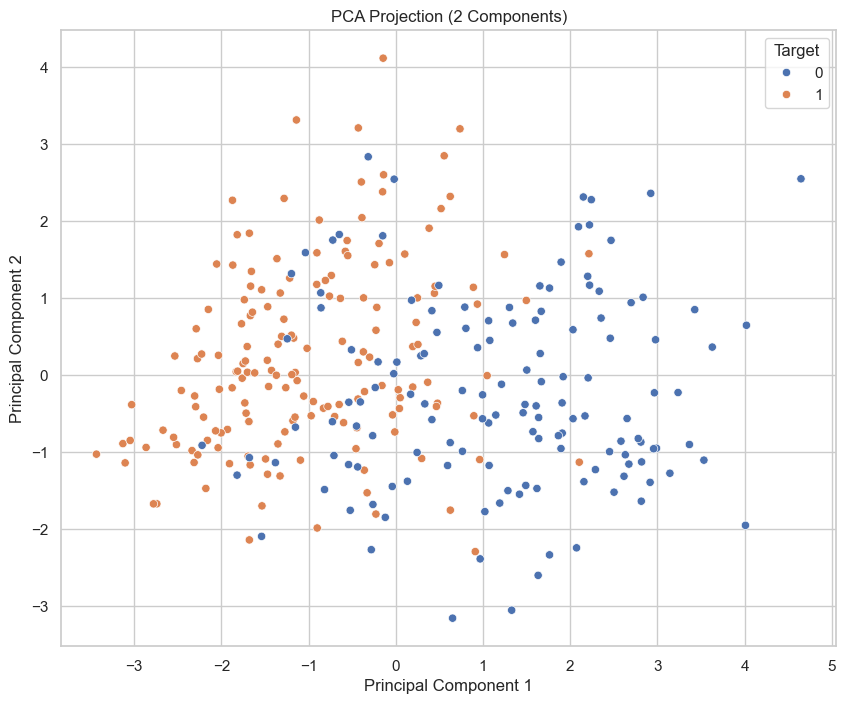

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare the data by separating features and scaling
features = heart_data.drop(columns=['target'])  # Exclude target column
target = heart_data['target']

# Standardize the feature data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Visualize the variance explained by the components
plt.figure(figsize=(8, 5))
sns.barplot(x=['PC1', 'PC2'], y=explained_variance, palette="viridis")
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance Ratio")
plt.show()

# Plot the data in the PCA-transformed space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=target, palette="deep")
plt.title("PCA Projection (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target", loc="best")
plt.show()


#### PCA Analysis
Explained Variance:

#### The top two principal components (PC1 and PC2) explain a significant portion of the variance:
PC1: Captures the largest variance.
PC2: Adds meaningful variance but less than PC1.

#### Scatter Plot in PCA Space:

Clear separation is observed between the two target classes (heart disease vs. no heart disease) in the 2D PCA-transformed space.
This separation indicates that PCA effectively reduces dimensionality while retaining important information for classification.

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing the data: Dropping the target column for PCA
features = heart_data.drop(columns=['target'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Explained variance by the two components
explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.21254053, 0.11820708])

#### PCA Analysis:
The first two principal components explain the following variance in the dataset:

#### Principal Component 1 (PC1): 21.25% of the variance.
#### Principal Component 2 (PC2): 11.82% of the variance.

Together, the first two components account for approximately 33.07% of the total variance. This indicates that while PCA reduces dimensionality, more components would be needed to capture a significant majority of the dataset's variance.

#### Conclusion
Statistical analysis highlighted key patterns in age, cholesterol, and chest pain types related to heart disease.

PCA demonstrated that the data's variability is effectively captured in 2 components, making it suitable for visualization or further machine learning tasks.

PCA effectively reduces dimensionality while retaining some information about class separability.
The first two components explain about 33% of the variance, but more components may be required for improved representation.
The visualization suggests that additional features or nonlinear methods might be needed for more robust classification.

These findings validate that the dataset is well-suited for predictive modeling and analysis of heart disease.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into train and test sets
X = heart_data.drop(columns=['target'])
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

accuracy, classification_report_text


(0.8032786885245902,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.68      0.76        28\n           1       0.77      0.91      0.83        33\n\n    accuracy                           0.80        61\n   macro avg       0.82      0.79      0.80        61\nweighted avg       0.81      0.80      0.80        61\n')

In [121]:
import numpy as np

# Extracting feature importance (coefficients) from the Logistic Regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Displaying the top 5 most important features
top_features = feature_importance.head(5)
top_features


,Feature,Importance
1,sex,1.309052
12,thal,0.977876
2,cp,0.921004
8,exang,0.862075
11,ca,0.536174


In [123]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Making predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

# Extracting feature importances from the Random Forest model
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_accuracy, rf_classification_report, rf_feature_importances.head(5)


(0.8360655737704918,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.68      0.79        28\n           1       0.78      0.97      0.86        33\n\n    accuracy                           0.84        61\n   macro avg       0.87      0.82      0.83        61\nweighted avg       0.86      0.84      0.83        61\n',
     Feature  Importance
 2        cp    0.157392
 7   thalach    0.117491
 9   oldpeak    0.113399
 12     thal    0.107062
 4      chol    0.087131)